# Granger Causality Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Since every student's data comes as a json file, so I would need to convert those json files into dataframes.

In [2]:
# read json files in "Stress" folder
from glob import glob
for f_name in glob('Data/Stress/*.json'):
    user_df = pd.read_json(f_name)

<h2> Prepare data

Since the date time in dataset is not well-formatted, I would need to convert the "resp_time" column data into pandas date_time object, and order it in consecutive order.




In [3]:
def get_date(row):
    date = row.split()[0] # get the date, leave out the time
    return date

def handle_NA(df,feature):
    '''
    This function takes in a dataframe and its feature that want to handle NA values with mean values
    input: dataframe, and its relevant features
    output: the feature of the dataframe with its NA values replaced by mean
    
    '''
    df[feature] = df[feature].replace(np.nan, np.mean(df[feature]))
    return df[feature]


def clean_resp_time(df):
    '''
    this function takes in a dataframe, and output a dataframe with clean resp time.
    input: data frame;
    output: data frame with nice-formatted resp_time
    '''
    
    df['resp_time'] = pd.to_datetime(df.resp_time)
    df.sort_values(by=['resp_time'],inplace=True)
    df.resp_time = df.resp_time.astype('str')
    df.resp_time = df.resp_time.apply(get_date)    
    df = df.groupby('resp_time').mean()
    df = df.reset_index()
    return df

Below codes work on extract specific data from data set:

In [4]:
def get_stress_data(f_name):
    '''
    This function is used to extract 'stress' data from dataset
    input: file name of the student in 'students' folder
    output: stress data as dataframe of this student
    
    Note: since in original dataset, 'stress level'= 4 means feeling good, 
    5 means feeling great,which are not we want, so I converted those scores to 0.

    '''
    user_df = pd.read_json(f_name)
    user_df.level = user_df.level.replace([4.0, 5.0], 0)  
    user_stress = user_df[['level','resp_time']]

    # clean date time data
    user_stress['resp_time'] = pd.to_datetime(user_stress.resp_time)
    user_stress.sort_values(by=['resp_time'],inplace=True)

    # handle NA values
    # user_stress = user_stress.dropna()
    user_stress.level = user_stress.level.replace(np.nan,np.mean(user_stress.level))
    user_stress.resp_time = user_stress.resp_time.astype('str')
    user_stress.resp_time = user_stress.resp_time.apply(get_date)    
    user_stress = user_stress.groupby('resp_time').mean()
    user_stress = user_stress.rename(columns = {'level':'stress_level'})
    user_stress = user_stress.reset_index()

    return user_stress


def get_actitivity_data(f_name):
    '''
    This function is used to extract 'activity' data from dataset
    input: file name of the student in 'students' folder
    output: activity data as dataframe of this student
    
    '''
    
    # read in activity data (u44)
    user_Activity = pd.read_json(f_name)
    user_Activity = user_Activity[['Social2','working','relaxing','resp_time']]

    # convert NA to mean value
    user_Activity['Social2'] = handle_NA(user_Activity,'Social2')
    user_Activity['working'] = handle_NA(user_Activity,'working')
    user_Activity['relaxing'] = handle_NA(user_Activity,'relaxing')
    
    user_Activity = clean_resp_time(user_Activity)
    return user_Activity


def get_sleep_data(f_name):
    '''
    This function is used to extract 'sleep' data from dataset
    input: file name of the student in 'students' folder
    output: sleep data as dataframe of this student
    
    Note: include information about student's sleeping hours
    
    '''
    user_sleep = pd.read_json(f_name)
    user_sleep = user_sleep[['resp_time','hour','rate']]

    # convert NA to mean value
    user_sleep['hour'] = handle_NA(user_sleep,'hour')
    user_sleep['rate'] = handle_NA(user_sleep,'rate')
    user_sleep = user_sleep.rename(columns = {'hour':'sleep_hour','rate':'sleep_rate'})
    user_sleep = clean_resp_time(user_sleep)
    return user_sleep


def get_behavior_data(f_name):
    '''
    This function is used to extract 'behavior' data from dataset
    input: file name of the student in 'students' folder
    output: behavior data as dataframe of this student
    
    '''
    user_behavior = pd.read_json(f_name)
    user_behavior = user_behavior[['resp_time','anxious','calm','disorganized','enthusiastic', 'critical','conventional']]
    
    user_behavior = user_behavior[['resp_time','anxious','calm','disorganized','enthusiastic', 'critical','conventional']]
    user_behavior.conventional = user_behavior.conventional.replace('null',np.nan).astype('float64')
    user_behavior.anxious = user_behavior.anxious.replace('null',np.nan).astype('float64')
    user_behavior.calm = user_behavior.calm.replace('null',np.nan).astype('float64')
    user_behavior.disorganized = user_behavior.disorganized.replace('null',np.nan).astype('float64')
    user_behavior.enthusiastic = user_behavior.enthusiastic.replace('null',np.nan).astype('float64')
    
    for col in ['anxious','calm','disorganized','enthusiastic','critical','conventional']:
        user_behavior[col] = handle_NA(user_behavior,col)

    user_behavior = clean_resp_time(user_behavior)
    return user_behavior


def get_exercise_data(f_name):
    '''
    This function is used to extract 'exercise' data from dataset
    input: file name of the student in 'students' folder
    output: exercise data as dataframe of this student
    
    Note: include information about how many hours the student exercise
    
    '''
    user_exercise = pd.read_json(f_name)
    user_exercise = user_exercise[['resp_time','exercise']]
    user_exercise['exercise'] = handle_NA(user_exercise,'exercise')
    user_exercise = clean_resp_time(user_exercise)
    return user_exercise


def get_lab_data(f_name):
    '''
    This function is used to extract 'lab' data from dataset
    input: file name of the student in 'students' folder
    output: lab data as dataframe of this student
    
    Note: include information about how many hours the student work in the lab
    
    '''
    user_lab = pd.read_json(f_name)
    user_lab = user_lab[['resp_time','duration']]
    user_lab['duration'] = handle_NA(user_lab,'duration')
    user_lab = clean_resp_time(user_lab)
    return user_lab

def get_social_data(f_name):
    '''
    This function is used to extract 'social' data from dataset
    input: file name of the student in 'students' folder
    output: social data as dataframe of this student
    
    Note: include information the social number of the student
    
    '''
    user_social = pd.read_json(f_name)
    user_social = user_social[['resp_time','number']]
    user_social['number'] = handle_NA(user_social,'number')
    user_social = user_social.rename(columns = {'number':'social_number'})
    user_social = clean_resp_time(user_social)
    return user_social

/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/si618/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

,resp_time,stress_level
0,2013-03-24,0.908046
1,2013-04-03,0.000000
2,2013-04-04,0.333333
3,2013-04-05,0.250000
4,2013-04-06,0.500000


Only take user44 as an example to test:

In [ ]:
u44_stress = get_stress_data('Data/Stress/Stress_u44.json')
print(len(u44_stress))

u44_activity = get_actitivity_data('Data/Activity/Activity_u44.json') 
print(len(u44_activity))

u44_sleep = get_sleep_data('Data/Sleep/Sleep_u44.json')
print(len(u44_sleep))

u44_behavior = get_behavior_data('Data/Behavior/Behavior_u44.json')
print(len(u44_behavior))

u44_exercise = get_exercise_data('Data/Exercise/Exercise_u44.json')
print(len(u44_exercise))

u44_lab = get_lab_data('Data/Lab/Lab_u44.json')
print(len(u44_lab))

u44_social = get_social_data('Data/Social/Social_u44.json')
print(len(u44_social))

<h2> Join dataframe & Plot

I am interested to see all features combined and study the causality relationship between student stress and all the different potential factors. So I combined all features into one whole dataframe. Below I first used one student(u44) as an example to see what result that I could get.


In [11]:
# join multiple dataframes
joined_df = pd.merge(u44_stress,u44_sleep,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_exercise,how='inner',on='resp_time') 
# joined_df = pd.merge(joined_df,u44_lab,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_activity,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_social,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_behavior,how='inner',on='resp_time') 
joined_df.head()

,resp_time,stress_level,sleep_hour,sleep_rate,exercise,Social2,working,relaxing,social_number,anxious,calm,disorganized,enthusiastic,critical,conventional
0,2013-04-03,0.000000,7.0,1.0,1,1.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
1,2013-04-04,0.333333,8.0,1.5,1,4.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
2,2013-04-05,0.250000,6.0,1.0,1,4.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
3,2013-04-07,1.000000,8.0,1.0,1,3.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
4,2013-04-08,1.000000,7.0,2.0,1,3.75,3.717949,1.743590,2.0,1.00,4.00,3.000000,2.000000,1.000000,4.0


After the dataframes are combined as one, I can output it as a csv file, which includes all the data that I am interested to know about user44.

In [12]:
# output clean data to csv file
joined_df.to_csv('Students/u44_data.csv',index = False)

I am interested to see the trend of the user by time, therefore when I read the user data into pandas, I parsed the "resp-time" data as pandas date_time object, using "parse_dates" combined with "date_parser" methods. This will allow me to do some munipulations of the time very conviniently.  (* important)

In [13]:
# set date_time as index of the data frame
from datetime import datetime

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('Students/u44_data.csv', parse_dates=['resp_time'], index_col=['resp_time'],date_parser=dateparse)

In [1]:
data.index

NameError: name 'data' is not defined

<h2> Analyze "stress" data

Now I am going to take a more in-depth look at the "stress" data. Since I have already read the data into datetime object earlier, I can easily specify the end index of our data frame to get the stress data within a particular time range that we care about.

In [16]:
# get stress data
ts = data['stress_level']   

# do some trial by specify the end-index ...
ts[:'2013-04-07']  

resp_time
2013-04-03    0.000000
2013-04-04    0.333333
2013-04-05    0.250000
2013-04-07    1.000000
Name: stress_level, dtype: float64

In [17]:
# or we can also specify a specific date ...
ts['2013-04']

resp_time
2013-04-03    0.000000
2013-04-04    0.333333
2013-04-05    0.250000
2013-04-07    1.000000
2013-04-08    1.000000
2013-04-09    0.750000
2013-04-10    1.500000
2013-04-11    1.000000
2013-04-21    1.000000
2013-04-22    2.000000
2013-04-25    1.000000
2013-04-27    1.000000
2013-04-29    2.000000
Name: stress_level, dtype: float64

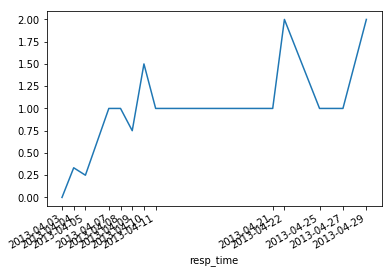

In [18]:
# trial: plot April data
ax = ts['2013-04'].plot() 
ax.set_xticks(ts['2013-04'].index)
plt.show()

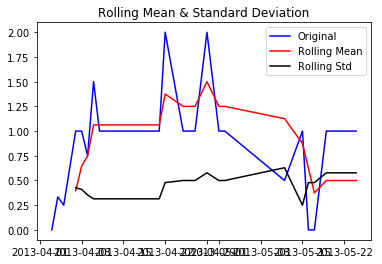

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [19]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(4).mean()  # set a smaller sliding window size for limited data amount
    rolstd = timeseries.rolling(4).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

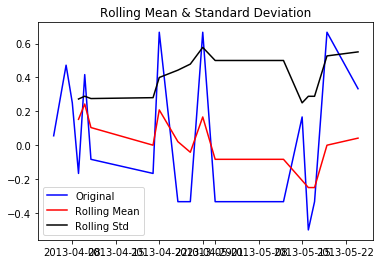

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [36]:
# ts_log_moving_avg_diff = ts_log - moving_avg
ts_moving_avg_diff = ts - moving_avg
# ts_log_moving_avg_diff.head()
ts_moving_avg_diff.head()

# ts_log_moving_avg_diff.dropna(inplace=True)
ts_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)    
test_stationarity(ts_moving_avg_diff)    

p-value = 0.95 > 0.05, indicates that the time-series is not steady enough.

<h4>指数加权移动平均法

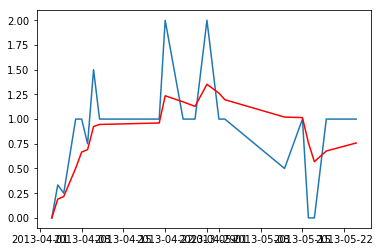

In [37]:
# 指数加权移动平均法
# expwighted_avg = pd.ewma(ts_log, halflife=12)
# expwighted_avg = ts_log.ewm(3).mean()  # set sliding window size to be 3
expwighted_avg = ts.ewm(3).mean()  # set sliding window size to be 3
# plt.plot(ts_log)
plt.plot(ts)
plt.plot(expwighted_avg, color='red')

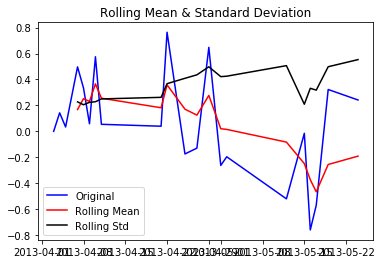

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [38]:
# 定义指数衰减量
# ts_log_ewma_diff = ts_log - expwighted_avg
ts_ewma_diff = ts - expwighted_avg
test_stationarity(ts_ewma_diff)

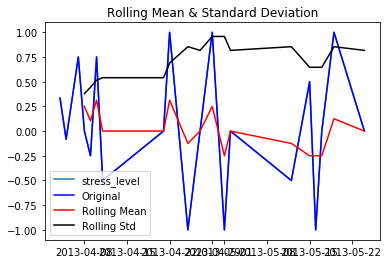

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [39]:
# 差分 -> 消除季节性和趋势
# ts_log_diff = ts_log - ts_log.shift()
ts_diff = ts - ts.shift()
# plt.plot(ts_log_diff)
plt.plot(ts_diff)

# 验证差分效果(有无更平稳)
# ts_log_diff.dropna(inplace=True)
ts_diff.dropna(inplace=True)
# test_stationarity(ts_log_diff)
test_stationarity(ts_diff)    # p-value还是很大

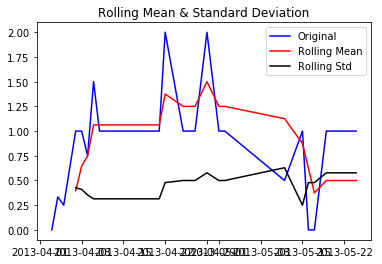

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [48]:
# 用同样的方法导入并smooth其他data(sleep, etc.)

test_stationarity(ts)

def plot_ts_moving_avg(ts):
    # 移动平均数
    moving_avg = ts.rolling(3).mean()  
    plt.plot(ts)
    plt.plot(moving_avg, color='red')

    
def plot_ts_expwighted_avg(ts):
    # 指数加权移动平均法
    expwighted_avg = ts.ewm(3).mean() 
    plt.plot(ts)
    plt.plot(expwighted_avg, color='red')


In [40]:
# 预测时间序列
from statsmodels.tsa.stattools import acf, pacf  # 时间序列的自回归函数和部分自回归函数
# lag_acf = acf(ts_log_diff, nlags=3)
lag_acf = acf(ts_diff, nlags=3)
# lag_pacf = pacf(ts_log_diff, nlags=3, method='ols')
lag_pacf = pacf(ts_diff, nlags=3, method='ols')

# 见下下面acf, pacf visualization

<h5> Plot ACF

Text(0.5, 1.0, 'Autocorrelation Function')

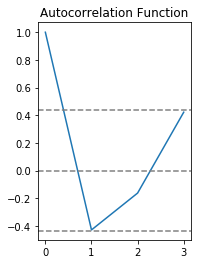

In [42]:
# 自相关函数（ACF）：这是时间序列和它自身滞后版本之间的相关性的测试
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

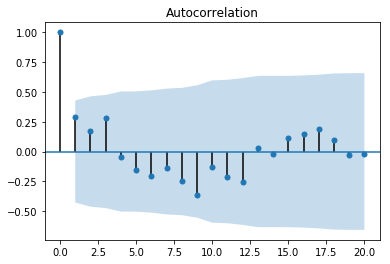

In [43]:
# 法二: plot ACF(自相关)  
# 图中 x 轴表示滞后值，y 轴上 -1 和 1 之间则表现了这些滞后值的正负相关性。
# 蓝色区域中的点表示统计学显着性。滞后值为 0 相关性为 1 的点表示观察值与其本身 100% 正相关。
# 这个分析为后续的比较过程提供了一个很好的基准。

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts)
plt.show()

解读：当lag < 3时，观察值与其本身呈正相关；当lag在3-13之间，观察值与其本身呈负相关。当lag>13时，观察值又与其自身成正相关。

<h5> Plot PACF

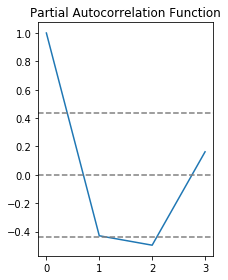

In [44]:
# 部分自相关函数(PACF):这是时间序列和它自身滞后版本之间的相关性测试，但是是在预测（已经通过比较干预得到解释）的变量后。
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [45]:
from statsmodels.tsa.arima_model import ARIMA

<h4> Prediciton: 自回归（AR）模型

/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 5.1710')

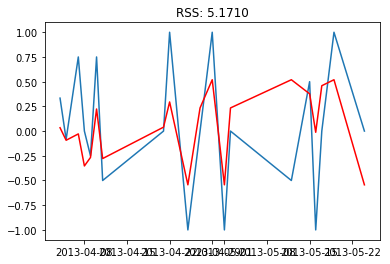

In [46]:
# 自回归（AR）模型
# model = ARIMA(ts_log, order=(2, 1, 0)) 
model = ARIMA(ts, order=(2, 1, 0)) 
results_AR = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))


<h4> ARIMA model (组合模型)

In [23]:
# model = ARIMA(ts_log, order=(0, 1, 2))  
model = ARIMA(ts, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
plt.plot(ts_diff)
plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_diff)**2))

NameError: name 'ARIMA' is not defined

<h4> 移动平均数（MA）模型

In [22]:

# model = ARIMA(ts_log, order=(2, 1, 2))
model = ARIMA(ts, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_diff)**2))

NameError: name 'ARIMA' is not defined

将结果导回到原始区间： 

In [40]:
# predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
# print predictions_ARIMA_diff.head()

predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True) #只有AR模型成功了
print (predictions_AR_diff.head())

resp_time
2013-04-04    0.033912
2013-04-05   -0.092863
2013-04-07   -0.028725
2013-04-08   -0.352865
2013-04-09   -0.267166
dtype: float64


累计总和：

In [41]:
# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# print predictions_ARIMA_diff_cumsum.head()

predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print (predictions_AR_diff_cumsum.head())

resp_time
2013-04-04    0.033912
2013-04-05   -0.058951
2013-04-07   -0.087676
2013-04-08   -0.440541
2013-04-09   -0.707707
dtype: float64


添加到基本值：

In [42]:
# predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
# predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
# predictions_ARIMA_log.head()

predictions_AR = pd.Series(ts.ix[0], index=ts.index)
predictions_AR = predictions_AR.add(predictions_AR_diff_cumsum,fill_value=0)
predictions_AR.head()

/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


resp_time
2013-04-03    0.000000
2013-04-04    0.033912
2013-04-05   -0.058951
2013-04-07   -0.087676
2013-04-08   -0.440541
dtype: float64